In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
import os
print(os.listdir("../"))

['us-census-demographic-data']


In [12]:
us_census=pd.read_csv("C:/Users/zcxu/Desktop/github/My Machine Learning Notes/interesting visualization/us-census-demographic-data/acs2015_county_data.csv")

In [13]:
us_census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [15]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3220 non-null int64
State              3220 non-null object
County             3220 non-null object
TotalPop           3220 non-null int64
Men                3220 non-null int64
Women              3220 non-null int64
Hispanic           3220 non-null float64
White              3220 non-null float64
Black              3220 non-null float64
Native             3220 non-null float64
Asian              3220 non-null float64
Pacific            3220 non-null float64
Citizen            3220 non-null int64
Income             3219 non-null float64
IncomeErr          3219 non-null float64
IncomePerCap       3220 non-null int64
IncomePerCapErr    3220 non-null int64
Poverty            3220 non-null float64
ChildPoverty       3219 non-null float64
Professional       3220 non-null float64
Service            3220 non-null float64
Office             3220 non-null float64
Constru

In [16]:
us_census.County.value_counts

<bound method IndexOpsMixin.value_counts of 0             Autauga
1             Baldwin
2             Barbour
3                Bibb
4              Blount
5             Bullock
6              Butler
7             Calhoun
8            Chambers
9            Cherokee
10            Chilton
11            Choctaw
12             Clarke
13               Clay
14           Cleburne
15             Coffee
16            Colbert
17            Conecuh
18              Coosa
19          Covington
20           Crenshaw
21            Cullman
22               Dale
23             Dallas
24             DeKalb
25             Elmore
26           Escambia
27             Etowah
28            Fayette
29           Franklin
            ...      
3190          Maunabo
3191         Mayagüez
3192             Moca
3193          Morovis
3194          Naguabo
3195        Naranjito
3196         Orocovis
3197         Patillas
3198         Peñuelas
3199            Ponce
3200     Quebradillas
3201           Rincón
3202      

In [17]:
us_census['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

Text(0.5,1,'Income Rate Given Region')

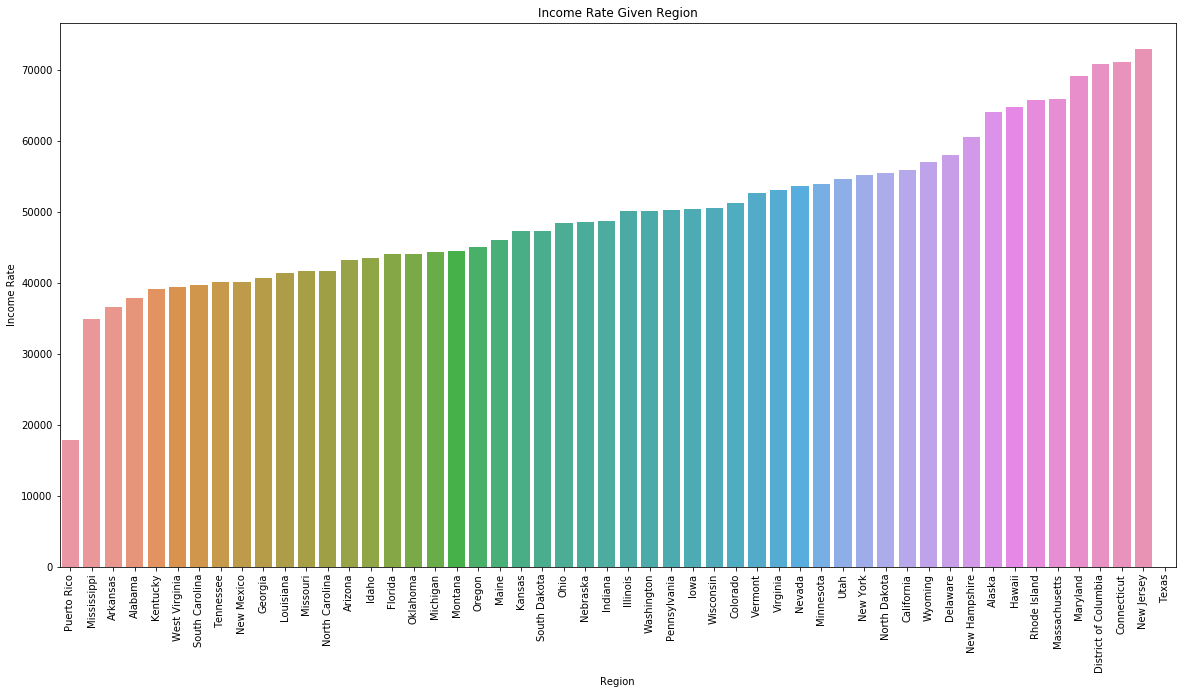

In [19]:
region_list = list(us_census['State'].unique())
region_income_ratio = []
for i in region_list:
    x = us_census[us_census['State']==i]
    # find how many county does the state have
    region_income_rate = sum(x.Income)/len(x)
    # calculate sum of income ratio and divided to found above
    region_income_ratio.append(region_income_rate)
    # append to list the state

# sorting
# sort the income ratio as from low to high
# if change the ascending state as False, sorting will change as from high to low
data = pd.DataFrame({'region_list':region_list, 'region_income_ratio': region_income_ratio})
new_index = (data['region_income_ratio'].sort_values(ascending=True)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(20, 10))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['region_income_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Income Rate')
plt.title('Income Rate Given Region')

Text(0.5,1,'most common 10 name of county')

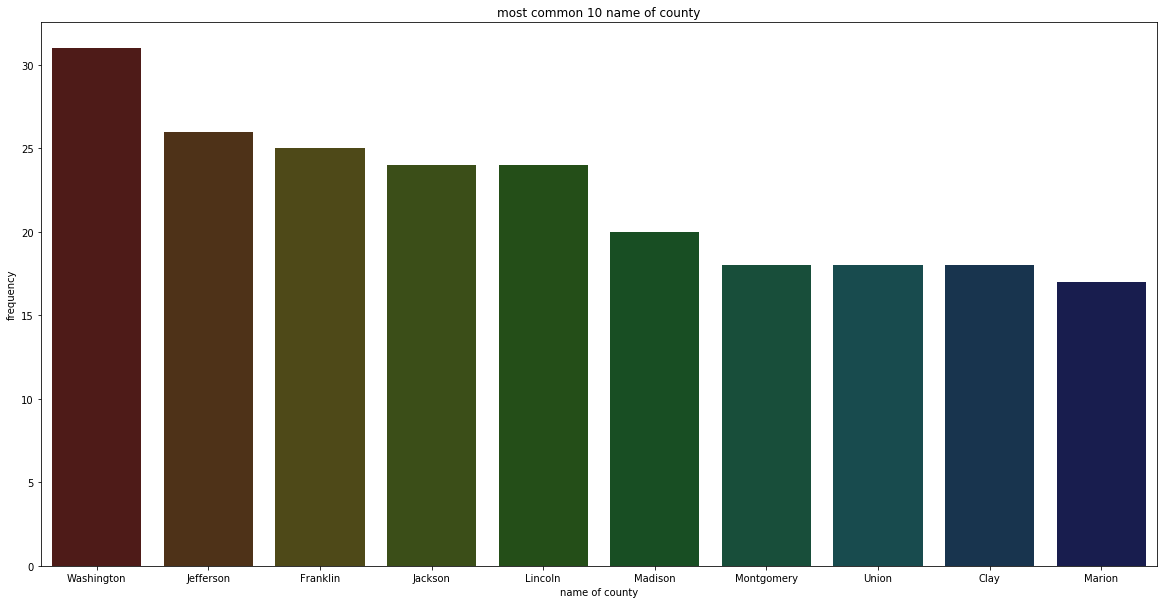

In [20]:
# most common 10 county name
loc_list = us_census["County"]
loc_count = Counter(loc_list)

most_common_locations=loc_count.most_common(10)
x, y = zip(*most_common_locations)
x, y = list(x), list(y)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=x, y=y, palette=sns.hls_palette(14, l=0.2, s=0.7))
plt.xlabel('name of county')
plt.ylabel('frequency')
plt.title('most common 10 name of county')

Text(0.5,1,'Poverty Rate Given State')

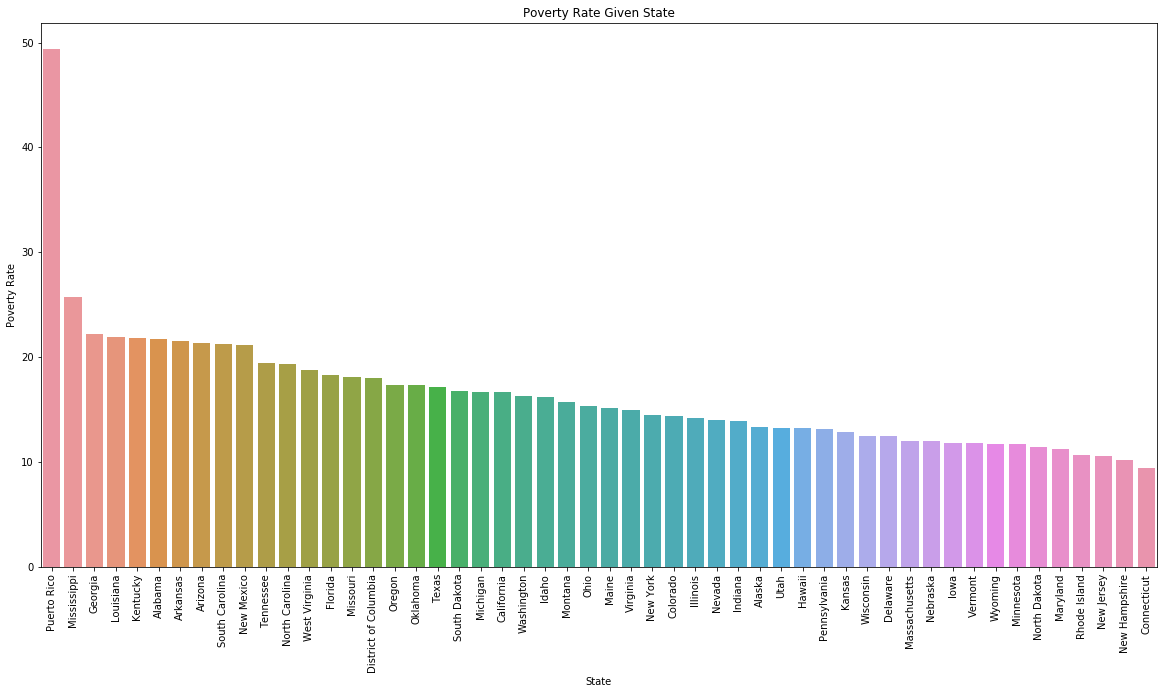

In [22]:
region_list = list(us_census['State'].unique())
state_poverty_ratio = []
for i in region_list:
    x = us_census[us_census['State']==i]
    # find how many county does the state have
    state_poverty_rate = sum(x.Poverty)/len(x)
    # then find sum of poverty ratio and divided to found above
    state_poverty_ratio.append(state_poverty_rate)
    # append to list the state

# sorting
data = pd.DataFrame({'region_list': region_list, 'state_poverty_ratio': state_poverty_ratio})
new_index = (data['state_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

# visualization
plt.figure(figsize=(20, 10))
sns.barplot(x=sorted_data2['region_list'], y=sorted_data2['state_poverty_ratio'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given State')

[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,'Percentage of States Population according to Races')]

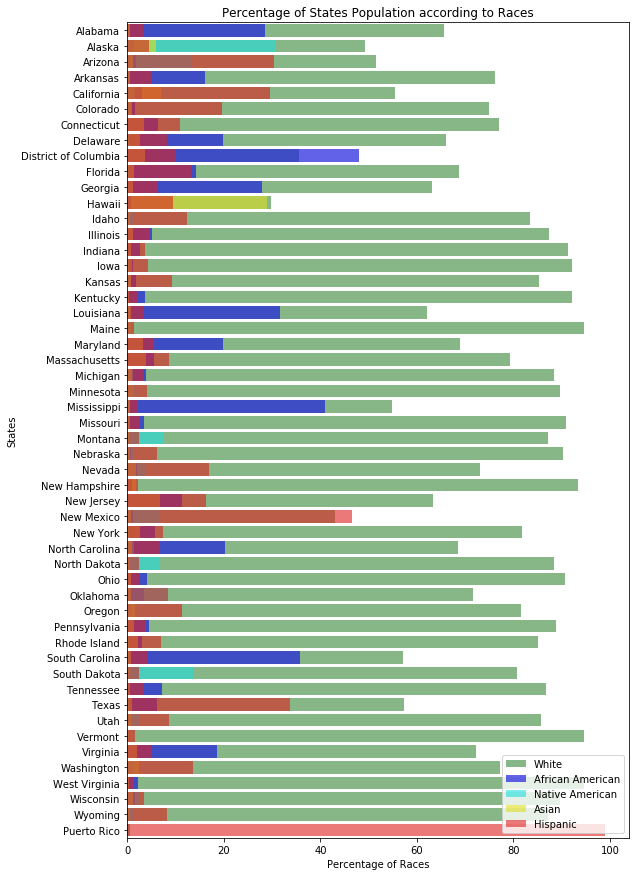

In [26]:
# Horizontal Bar Plot
area_list = list(us_census['State'].unique())

# create 5 empty list to keep each races
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

# find the number of each races in the States
for i in area_list:
    x = us_census[us_census['State'] == i]
    share_white.append(sum(x.White)/len(x))
    share_black.append(sum(x.Black)/len(x))
    share_native_american.append(sum(x.Native)/len(x))
    share_asian.append(sum(x.Asian)/len(x))
    share_hispanic.append(sum(x.Hispanic)/len(x))

# visualization
f, ax = plt.subplots(figsize=(9, 15))
sns.barplot(x=share_white, y=area_list, color='green', alpha=0.5, label='White')
sns.barplot(x=share_black, y=area_list, color='blue', alpha=0.7, label='African American')
sns.barplot(x=share_native_american, y=area_list, color='cyan', alpha=0.6, label='Native American')
sns.barplot(x=share_asian, y=area_list, color='yellow', alpha=0.6, label='Asian')
sns.barplot(x=share_hispanic, y=area_list, color='red', alpha=0.6, label='Hispanic')

ax.legend(loc='lower right', frameon=True)
ax.set(xlabel='Percentage of Races', ylabel='States', title='Percentage of States Population according to Races')

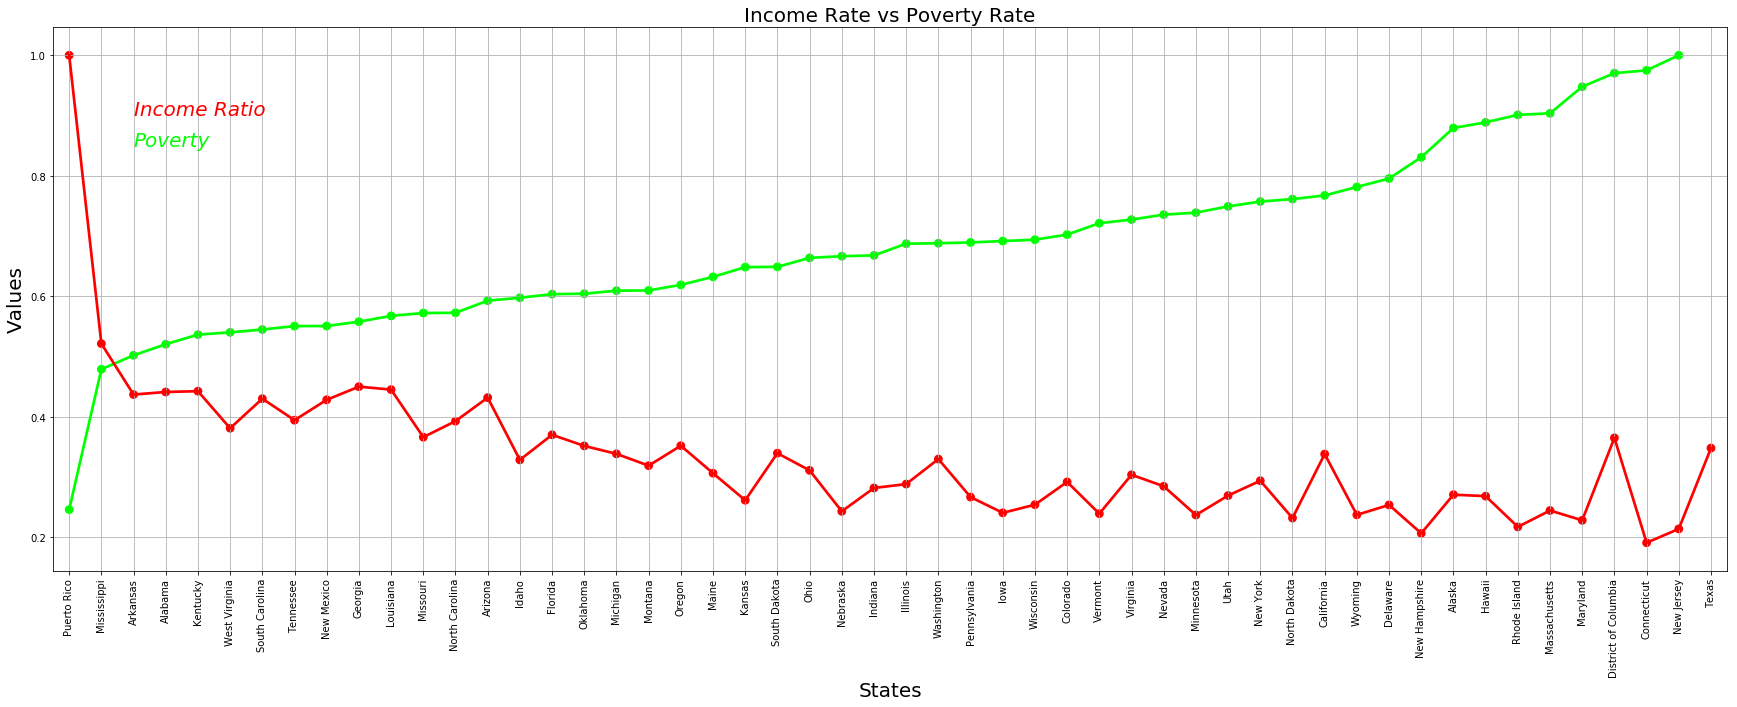

In [28]:
sorted_data['region_income_ratio'] = sorted_data['region_income_ratio']/max(sorted_data['region_income_ratio'])
sorted_data2['state_poverty_ratio'] = sorted_data2['state_poverty_ratio']/max(sorted_data2['state_poverty_ratio'])
data = pd.concat([sorted_data, sorted_data2['state_poverty_ratio']], axis=1)
data.sort_values('region_income_ratio', inplace=True)

# visualize
f, ax1=plt.subplots(figsize=(30, 10))
sns.pointplot(x='region_list', y='region_income_ratio', data=data, color='lime', alpha=0.8)
sns.pointplot(x='region_list', y='state_poverty_ratio', data=data, color='red', alpha=0.8)
plt.text(2, 0.9, 'Income Ratio', color='red', fontsize=20, style='italic')
plt.text(2, 0.85, 'Poverty', color='lime', fontsize=20, style='italic')
plt.xlabel('States', fontsize=20, color='black')
plt.xticks(rotation = 90)
plt.ylabel('Values', fontsize=20, color='black')
plt.title('Income Rate vs Poverty Rate', fontsize=20, color='black')
plt.grid()

E:\anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


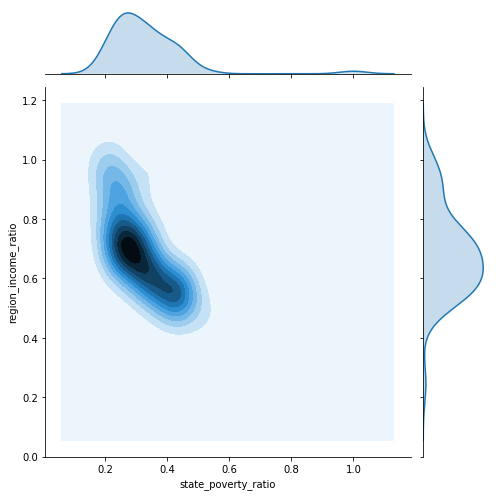

In [29]:
# joint plot
# visualization of region income rate vs state poverty rate of each state with different style of seaborn code joint kernel density
g = sns.jointplot(data.state_poverty_ratio, data.region_income_ratio, kind='kde', size=7)
plt.savefig('graph.png')
plt.show()